In [1]:
import pandas as pd
import sqlite3 as sq

## Create connection

In [2]:
db =  sq.connect('../data/checking-logs.sqlite.sqlite')

## Querry

In [3]:
query = 'SELECT timestamp FROM checker WHERE uid LIKE "user_%";'
df = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])

In [4]:
df['date'] = df['timestamp'].apply(lambda x: x.floor('D'))

daytimes = ['night', 'morning', 'afternoon', 'evening']
df['daytime'] = pd.cut(df['timestamp'].apply(lambda x: x.hour), 
bins = [0, 3, 10, 16, 23], labels = daytimes, include_lowest=True)

In [5]:
for i in daytimes:
    df[i] = df.daytime.apply(lambda x: 1 if x == i else 0)
df = df.groupby(df['date']).sum()[daytimes]

## Create graph

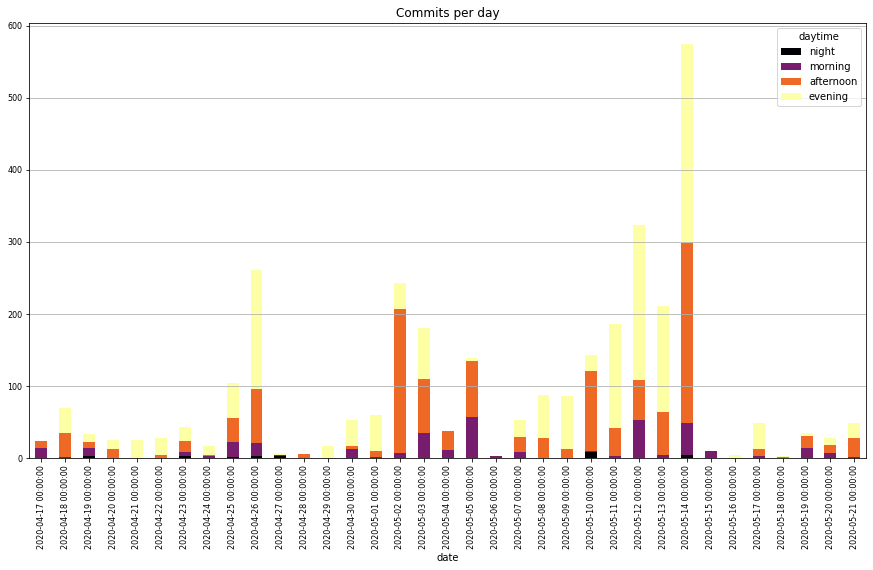

In [67]:
bars = df.plot.bar(colormap='inferno', stacked=True, fontsize = 8, xlabel = 'date', figsize = (15, 8), title = "Commits per day", rot = 90)
bars.yaxis.grid()
bars.legend(title='daytime')

In [65]:
db.close()

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?
## - afternoon, evening

## Which day has:
## ∗ the most number of commits 
## ∗ and at the same time, the number of commits in the evening is higher than in the afternoon? 12.05.2020